In [38]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

data = pd.read_csv("multiclass_data.csv", header = None)

num_labels = 3

X = data.loc[:, 0:4]
y = data.loc[:, 5]

X = np.array(X)
y = np.array(y)

X = (X - X.mean())/X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

## My Logistic Regression

In [39]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradient_descent(X, h, y):
    return np.dot(X.T, (y - h)) / y.shape[0]

def update_weight_loss(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

def accuracy_metric(y_pred, y_test):
    correct = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_test))

__Different learning rates__

Learning rate: 0.1
Learning rate: 0.5
Learning rate: 2


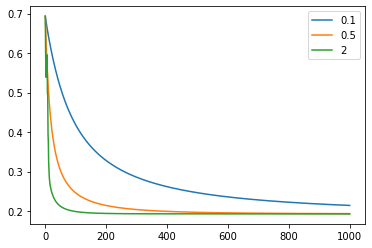

In [40]:
alpha = [0.1, 0.5, 2]
num_iter = 1000
classifiers_train = np.zeros((num_labels, len(y_train)))
classifiers_test = np.zeros((num_labels, len(y_test)))

plt.figure()


for a in alpha:
    label = 0
    print("Learning rate: {}".format(a))
    
    y_train_ = np.where(y_train == label, 1, 0)
    y_test_ = np.where(y_test == label, 1, 0)
    
    theta = np.zeros(X_train.shape[1])
    loss_ = []
    for i in range(num_iter):
        h = sigmoid(X_train, theta)
        gradient = gradient_descent(X_train, h, y_train_)
        theta = update_weight_loss(theta, a, gradient)
        loss_.append(loss(h,y_train_))
    
    plt.plot(np.linspace(0,len(loss_),len(loss_)), loss_)
    
    
    result_train = sigmoid(X_train, theta)
    result_test = sigmoid(X_test, theta)
    
    classifiers_train[label, :] = result_train
    classifiers_test[label, :] = result_test
    
plt.legend([alpha[0], alpha[1], alpha[2]])

In [41]:
num_iter = 10000
classifiers_train = np.zeros((num_labels, len(y_train)))
classifiers_test = np.zeros((num_labels, len(y_test)))

for label in range(0, num_labels):
    print("{} vs all \n".format(label))
    
    y_train_ = np.where(y_train == label, 1, 0)
    y_test_ = np.where(y_test == label, 1, 0)
    
    theta = np.zeros(X_train.shape[1])
    
    for i in range(num_iter):
        h = sigmoid(X_train, theta)
        gradient = gradient_descent(X_train, h, y_train_)
        theta = update_weight_loss(theta, 1, gradient)
    
    result_train = sigmoid(X_train, theta)
    result_test = sigmoid(X_test, theta)
    
    classifiers_train[label, :] = result_train
    classifiers_test[label, :] = result_test

0 vs all 

1 vs all 

2 vs all 



In [42]:
predictions_train = classifiers_train.argmax(axis=0)
predictions_test = classifiers_test.argmax(axis=0)

print('Tačnost na obučavajućem skupu: ', accuracy_metric(predictions_train, y_train))
print('Tačnost na testirajućem skupu: ', accuracy_metric(predictions_test, y_test))

Tačnost na obučavajućem skupu:  0.7226890756302521
Tačnost na testirajućem skupu:  0.8135593220338984


## Built-in Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(multi_class = 'ovr')
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

print('Tačnost na obučavajućem skupu: ', accuracy_score(y_pred_train, y_train))
print('Tačnost na testirajućem skupu: ', accuracy_score(y_pred, y_test))

Tačnost na obučavajućem skupu:  0.6722689075630253
Tačnost na testirajućem skupu:  0.711864406779661


C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
